In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perturbations import RBPIndividual, zeroPerturb, noisePerturb, blurPerturb
from models import *
from data import perturb, generateSynthetic, generateSyntheticPerturbReal


In [2]:
# Test Important Content Removal

In [3]:
x_train, y_train, x_test_original, y_test_original = generateSynthetic('perturb',500,50)

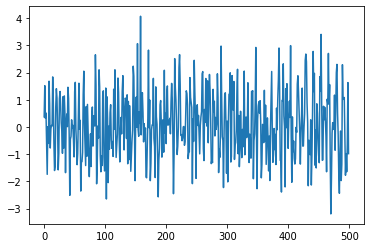

In [4]:
plt.plot(x_train[0])

In [32]:
model = make_CNN_model(x_train.shape[1:])
trained_model, history = train_CNN_model(model, x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 4s 208ms/step - loss: 0.5999 - sparse_categorical_accuracy: 0.7325 - val_loss: 0.6810 - val_sparse_categorical_accuracy: 0.4950
Epoch 2/100
13/13 [==============================] - 2s 183ms/step - loss: 0.4463 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.7081 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/100
13/13 [==============================] - 2s 183ms/step - loss: 0.3780 - sparse_categorical_accuracy: 0.9438 - val_loss: 0.7645 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
13/13 [==============================] - 2s 173ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0.9438 - val_loss: 0.7671 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
13/13 [==============================] - 2s 179ms/step - loss: 0.3004 - sparse_categorical_accuracy: 0.9525 - val_loss: 0.7910 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/100
13/13 [==============================] - 2s 177ms/step - loss: 0.2757 - sparse_cate

13/13 [==============================] - 2s 178ms/step - loss: 0.0705 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1260 - val_sparse_categorical_accuracy: 0.9750
Epoch 47/100
13/13 [==============================] - 2s 177ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.8350
Epoch 48/100
13/13 [==============================] - 2s 171ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.1478 - val_sparse_categorical_accuracy: 0.9350
Epoch 49/100
13/13 [==============================] - 2s 175ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.2422 - val_sparse_categorical_accuracy: 0.8950
Epoch 50/100
13/13 [==============================] - 2s 174ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.1583 - val_sparse_categorical_accuracy: 0.9350
Epoch 51/100
13/13 [==============================] - 2s 173ms/step - loss: 0.0661 - sparse_categorical

In [35]:
test_loss, test_acc = trained_model.evaluate(x_test_original, y_test_original)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4/4 [==============================] - 0s 15ms/step - loss: 1.2070 - sparse_categorical_accuracy: 0.5800
Test accuracy 0.5799999833106995
Test loss 1.2070051431655884


In [36]:
predictions_original = model.predict(x_test_original)
perturb_test_set = x_test_original.copy()
perturb_test_set = perturb_test_set.reshape(x_test_original.shape[0:2])
x_test_rbp = np.asarray([perturb('RBP',x,400,500) for x in perturb_test_set])
predictions_rbp = model.predict(x_test_rbp)
x_test_zero = np.asarray([perturb('zero',x,400,500) for x in perturb_test_set])
predictions_zero = model.predict(x_test_zero)
x_test_noise = np.asarray([perturb('noise',x,400,500) for x in perturb_test_set])
predictions_noise = model.predict(x_test_noise)
x_test_blur = np.asarray([perturb('blur',x,400,500) for x in perturb_test_set])
predictions_blur = model.predict(x_test_blur)

In [37]:
def accuracy(predictions, labels):
    hits = 0
    for i in range(0,len(predictions)):
        if predictions[i] == labels[i]:
            hits += 1
    return hits/len(predictions)

In [38]:
original_accuracy = accuracy(np.argmax(predictions_original,axis=1), y_test_original)
rbp_accuracy = accuracy(np.argmax(predictions_rbp,axis=1), y_test_original)
zero_accuracy = accuracy(np.argmax(predictions_zero,axis=1), y_test_original)
noise_accuracy = accuracy(np.argmax(predictions_noise,axis=1), y_test_original)
blur_accuracy = accuracy(np.argmax(predictions_blur,axis=1), y_test_original)

In [39]:
print(" Original Accuracy: " + str(original_accuracy) + "\n"+
    " RBP Accuracy: " + str(rbp_accuracy) + "\n"+
    " Zero Accuracy: " + str(zero_accuracy) + "\n"+
    " Noise Accuracy: " + str(noise_accuracy) + "\n"+
    " Blur Accuracy: " + str(blur_accuracy) + "\n")

 Original Accuracy: 0.58
 RBP Accuracy: 0.49
 Zero Accuracy: 0.49
 Noise Accuracy: 0.5
 Blur Accuracy: 0.5



In [25]:
# Test Realism 

In [26]:
## Generate Synthetic Data 

In [40]:
perturbed_datasets = generateSyntheticPerturbReal(500)

In [41]:
# Create Model

In [42]:
datasets_training_loss = []
for dataset in perturbed_datasets: 
    model = make_CNN_model(dataset[0].shape[1:])
    trained_model, history = train_CNN_model(model, dataset[0], dataset[1], epochs=10)
    datasets_training_loss.append(history.history['val_loss'])

Epoch 1/10
13/13 [==============================] - 4s 226ms/step - loss: 0.6925 - sparse_categorical_accuracy: 0.5362 - val_loss: 0.6980 - val_sparse_categorical_accuracy: 0.5050
Epoch 2/10


KeyboardInterrupt: 

In [ ]:

for loss in datasets_training_loss:
    plt.plot(loss)
plt.title('Model Loss Under Different Perturbations')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['RBP','zero','random','blur'], loc='upper left')
plt.savefig("realistic_perturb.eps", format='eps')
plt.show()